# Basic RX pulse v1

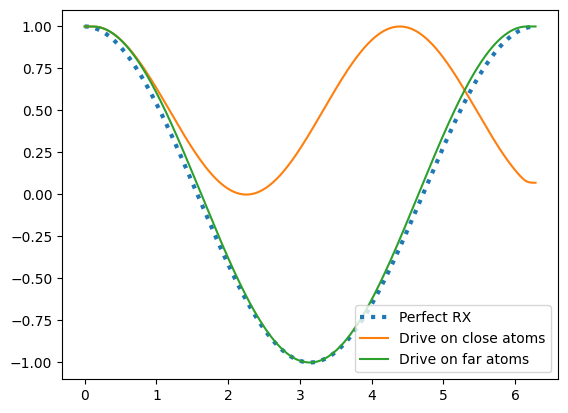

In [1]:
from __future__ import annotations

import matplotlib.pyplot as plt
import numpy as np
from qadence2_expressions import NativeDrive, Z

from qadence2 import Register, code_compile

# Encoding the rotation angle in the duration, to match the previous plots
omega = 1.0 / (2 * np.pi)
max_duration = 2 * np.pi

# Atoms close
spacing = 1.0
qubit_positions = [(0, 0), (0, spacing)]
register = Register(grid_type="square", qubit_positions=qubit_positions)
expr = NativeDrive(max_duration, omega, 0.0, 0.0)()

module = code_compile(expr, "analog", register=register)
rotation_close = -1.0 * module.expectation(observable=Z(0))[0]

# Atoms far away
spacing = 10.0
qubit_positions = [(0, 0), (0, spacing)]
register = Register(grid_type="square", qubit_positions=qubit_positions)
expr = NativeDrive(max_duration, omega, 0.0, 0.0)()

module = code_compile(expr, "analog", register=register)
rotation_far = -1.0 * module.expectation(observable=Z(0))[0]

# plot
theta_vals = np.linspace(0, max_duration, len(rotation_close))

plt.plot(theta_vals, np.cos(theta_vals), linewidth=3, linestyle="dotted", label="Perfect RX")
plt.plot(theta_vals, rotation_close, label="Drive on close atoms")
plt.plot(theta_vals, rotation_far, label="Drive on far atoms")
plt.legend()
plt.show()

# Basic ramp v2

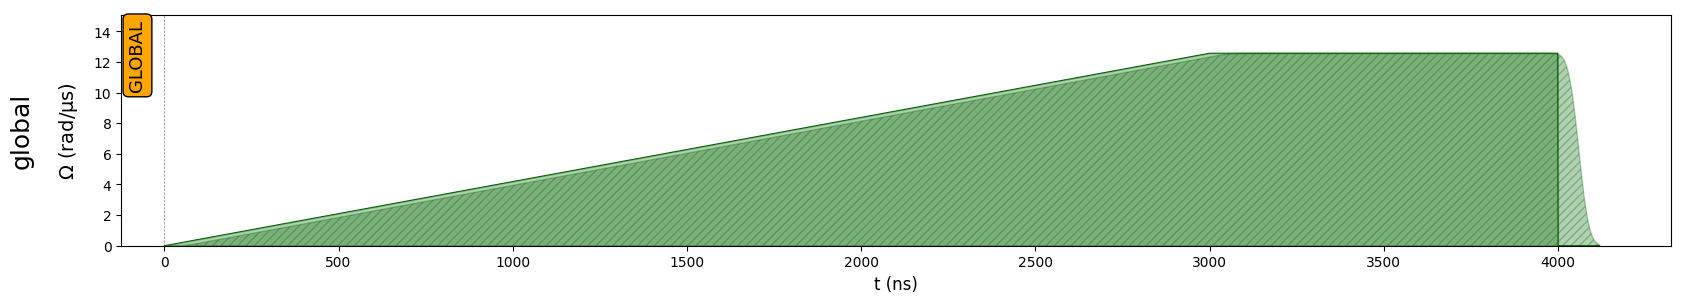

In [2]:
from qadence2_expressions import PiecewiseDrive, Z, array_parameter

from qadence2 import Register, code_compile

# Qadence2 currently uses a factor of 5 in distance unit, so
# we use a factor (8/5) to match the previous plot
spacing = (8/5) * 1.0
qubit_positions = [(0, 0), (0, spacing)]
register = Register(grid_type="square", qubit_positions=qubit_positions)

duration = array_parameter("duration", 2)
amplitude = array_parameter("amplitude", 3)
detuning = array_parameter("detuning", 3)

expr = PiecewiseDrive(duration, amplitude, detuning, 0.0)()

module = code_compile(expr, "analog", register=register)

# This value was manually picked to match the 4000 ns used previously
max_duration = 8.0

values = {
    "duration": [(3/4) * max_duration, (1/4) * max_duration],
    "amplitude": [0.0, 1.0, 1.0],
    "detuning": [0.0, 0.0, 0.0]
}

module.draw(values)

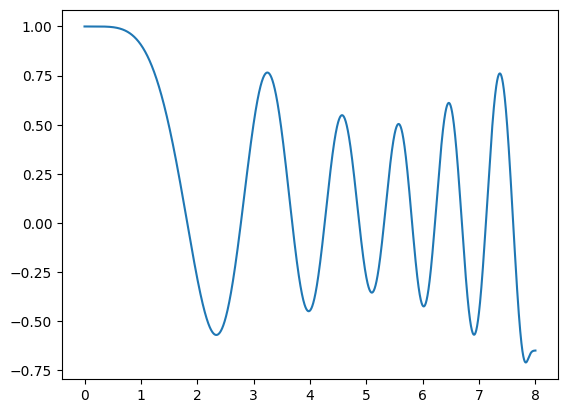

In [3]:
import matplotlib.pyplot as plt

exp_vals = -1.0 * module.expectation(observable=Z(0), values=values)[0]

time_vals = np.linspace(0, max_duration, len(exp_vals))

plt.plot(time_vals, exp_vals)
plt.show()

# Basic MIS v1

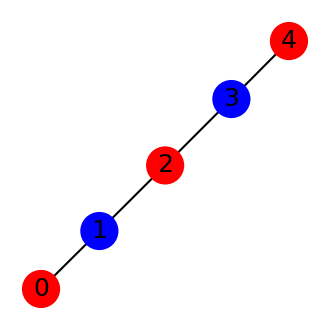

In [4]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

n_qubits = 5

graph = nx.path_graph(n_qubits)

mis_sol = nx.approximation.maximum_independent_set(graph)

node_colors = ["red" if node in mis_sol else "blue" for node in graph]

plt.figure(3, figsize=(2, 2), dpi = 150)
nx.draw(graph, node_color = node_colors, with_labels = True)

In [5]:
from qadence2 import Register

n_qubits = 5

qubit_positions = [(i, 0) for i in range(n_qubits)]

register = Register(grid_type="square", qubit_positions=qubit_positions)

In [6]:
total_duration = 7.99
rise_duration = 0.5
fall_duration = 1.0
max_amplitude = 1.0
initial_detuning = -0.3
final_detuning = 0.3
sweep_duration = total_duration - rise_duration - fall_duration

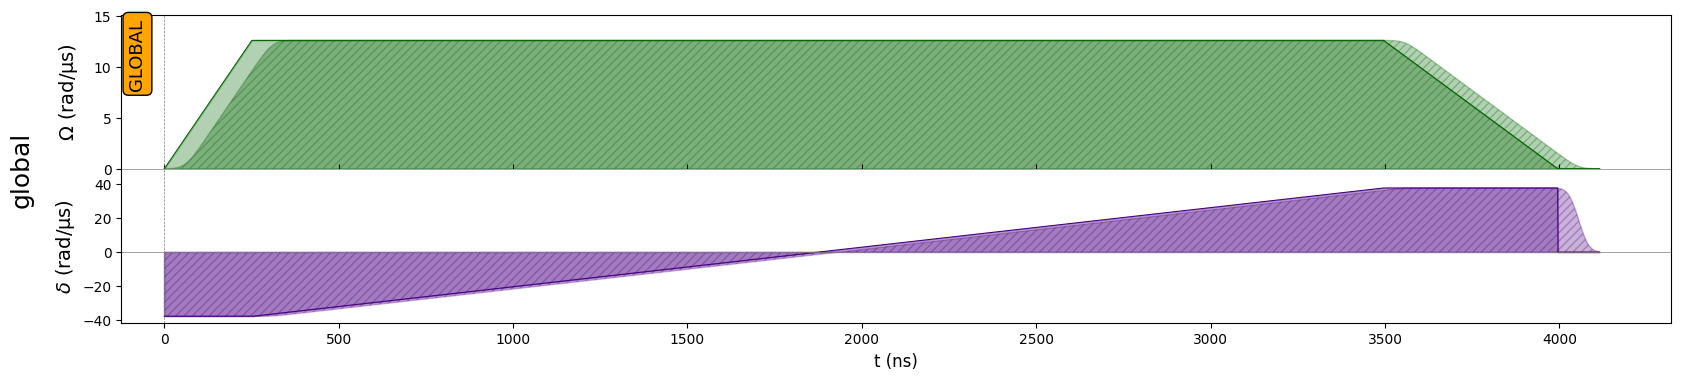

In [7]:
duration = array_parameter("duration", 3)
amplitude = array_parameter("amplitude", 4)
detuning = array_parameter("detuning", 4)

expr = PiecewiseDrive(duration, amplitude, detuning, 0.0)()

module = code_compile(expr, "analog", register=register)

values = {
    "duration": [rise_duration, sweep_duration, fall_duration],
    "amplitude": [0.0, 1.0, 1.0, 0.0],
    "detuning": [-0.3, -0.3, 0.3, 0.3]
}

module.draw(values)

In [8]:
module.sample(shots = 1000, values = values)

Counter({'10101': 972,
         '01001': 9,
         '10010': 9,
         '01010': 4,
         '00101': 3,
         '10100': 3})